NLP With DATA ANALYSIS

In [ ]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.express as px


In [ ]:
data=pd.read_excel('TestData.xlsx')

In [ ]:
data.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [ ]:
data.shape

(6448, 3)

In [ ]:
data['Location'].unique()

array(['Sebastian', 'Los Angeles', 'Georgia', ..., 'India', 'Malaysia',
       'Trinidad and Tobago'], dtype=object)

In [ ]:
data['Location'].nunique()

1082

In [ ]:
data.isna().sum()

Review        55
date           0
Location    4737
dtype: int64

In [ ]:
data1=data['date']

In [ ]:
data1

0      2019-08-20
1      2019-08-20
2      2019-08-20
3      2019-08-20
4      2019-08-19
          ...    
6443   2019-07-12
6444   2019-07-12
6445   2019-07-10
6446   2019-07-10
6447   2019-07-10
Name: date, Length: 6448, dtype: datetime64[ns]

In [ ]:
date_series = pd.to_datetime(data1)


In [ ]:
# Find the starting date (minimum date)
start_date = date_series.min()

# Find the ending date (maximum date)
end_date = date_series.max()

# Display the results
print("Starting Date:", start_date)


Starting Date: 2018-08-01 00:00:00


In [ ]:
print("Ending Date:", end_date)

Ending Date: 2019-08-20 00:00:00


## NLP

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
analyzer = SentimentIntensityAnalyzer()


In [ ]:
# Convert the "Text" column to strings
data['Review'] = data['Review'].astype(str)

In [ ]:
# Perform sentiment analysis and store the results in a new column
data['SentimentScore'] = data['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

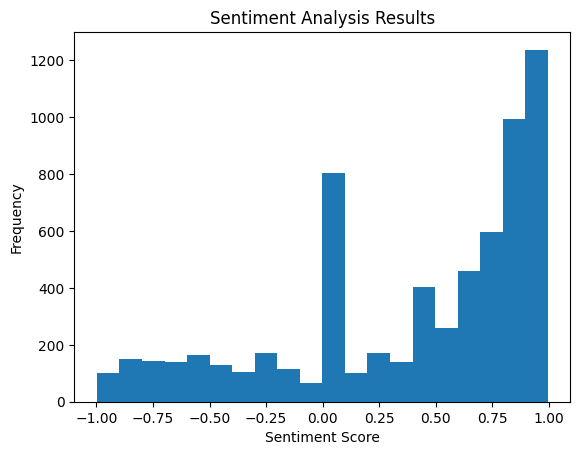

In [ ]:
plt.hist(data['SentimentScore'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis Results')
plt.show()

In [ ]:
data['SentimentScore']

0       0.9421
1       0.8360
2       0.6588
3       0.3634
4       0.9260
         ...  
6443    0.9716
6444    0.0000
6445    0.2975
6446    0.0000
6447    0.0979
Name: SentimentScore, Length: 6448, dtype: float64

In [ ]:
# Set threshold values for categorization
positive_threshold = 0.2
negative_threshold = -0.2

# Categorize based on sentiment scores
data['Sentiment_Category'] = data['SentimentScore'].apply(lambda score: 'Positive' if score > positive_threshold else 'Negative' if score < negative_threshold else 'Neutral')

# Print the categorized reviews
print(data[['Review', 'Sentiment_Category']])

                                                 Review Sentiment_Category
0     I was very impressed with the resort.\n Great ...           Positive
1     The rooms were nice the outside needs work als...           Positive
2     Great location! I have stayed at this hotel on...           Positive
3     The hotel was adequate for my stay. The strips...           Positive
4     Great location, room was large and spacious. P...           Positive
...                                                 ...                ...
6443  ·the staff were all so friendly. frank, the ch...           Positive
6444         ·the internet barely worked or didn't work            Neutral
6445  ·the location was great.\n \n \n \n \n ·the be...           Positive
6446  ·we were early for check in and the staff was ...            Neutral
6447  ·staff, free coffee, location and activities.\...            Neutral

[6448 rows x 2 columns]


In [ ]:
data['Sentiment_Category'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
# Print the total count of each sentiment category
sentiment_counts = data['Sentiment_Category'].value_counts()
print("\nSentiment Category Counts:")
print(sentiment_counts)


Sentiment Category Counts:
Positive    4257
Negative    1103
Neutral     1088
Name: Sentiment_Category, dtype: int64


In [ ]:
pip install langdetect

In [ ]:
pip install iso639

In [ ]:
from langdetect import detect, lang_detect_exception


# Function to detect the language with error handling for short texts
def detect_language(text):
    try:
        if len(text) >= 3:  # Adjust the minimum length as needed
            return detect(text)
        else:
            return 'Unknown'
    except lang_detect_exception.LangDetectException:
        return 'Unknown'

# Detect the language of each review and store it in a new column 'Language'
data['Language'] = data['Review'].apply(detect_language)

# Print the reviews along with detected languages
print(data[['Review', 'Language']])

                                                 Review Language
0     I was very impressed with the resort.\n Great ...       en
1     The rooms were nice the outside needs work als...       en
2     Great location! I have stayed at this hotel on...       en
3     The hotel was adequate for my stay. The strips...       en
4     Great location, room was large and spacious. P...       en
...                                                 ...      ...
6443  ·the staff were all so friendly. frank, the ch...       en
6444         ·the internet barely worked or didn't work       en
6445  ·the location was great.\n \n \n \n \n ·the be...       en
6446  ·we were early for check in and the staff was ...       en
6447  ·staff, free coffee, location and activities.\...       en

[6448 rows x 2 columns]


In [ ]:
data['Language'].unique()

array(['en', 'es', 'ja', 'fr', 'tl', 'it', 'de', 'nl', 'Unknown', 'zh-cn',
       'sv', 'da', 'pt', 'no', 'zh-tw', 'ko', 'ca', 'fi', 'et', 'af',
       'pl', 'ru', 'he', 'ar'], dtype=object)

In [ ]:
data['Language'].nunique()

24

In [ ]:
# Print the total count of each language category
language_counts = data['Language'].value_counts()
print("\nLanguage Category Counts:")
print(language_counts)


Language Category Counts:
en         5865
es          166
de           90
fr           73
tl           55
it           35
ja           34
pt           31
nl           23
da           19
no           10
ko           10
sv            8
et            5
af            5
zh-cn         4
fi            4
ca            3
pl            2
ru            2
Unknown       1
zh-tw         1
he            1
ar            1
Name: Language, dtype: int64


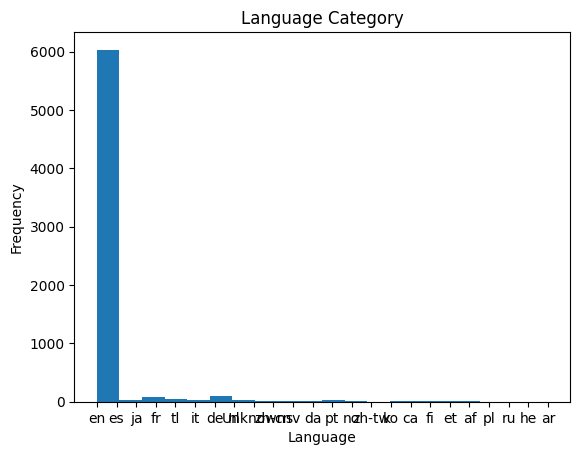

In [ ]:
plt.hist(data['Language'], bins=20)
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Language Category')
plt.show()

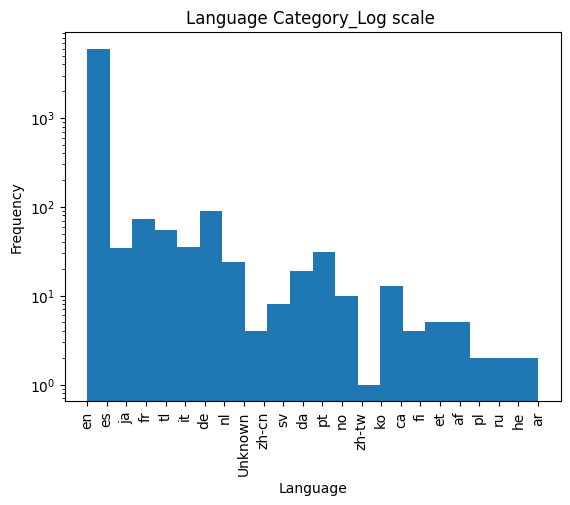

In [ ]:
# Create a histogram
plt.hist(data['Language'], bins=20)
# Apply a logarithmic scale to the y-axis
plt.yscale('log')
plt.xlabel('Language')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Language Category_Log scale ')
plt.show()